# U21 Health Sciences Group 2024 Annual Meeting
---
**PLENARY 2**\
Artificial Intelligence: Revolutionizing Healthcare with Large Language Models

**Hands-On Workshop**\
Trustworthy Generative AI: Improving routine care through application of Retrieval-augmented generation of clinical guidelines

---

💡 Before starting:
1. Please save a copy of this codebook to your local drive via "**File**" > "**Save a copy in Drive**" and start working in this copy.
2. This notebook needs a GPU to run properly. Please make sure to check the selected <font color='green'>GPU</font> via the main menu "**Runtime**" > "**Change runtime type**" and switch the runtime if needed to T4 GPU.

---

# Navigating the Notebook

Currently, you have a [Jupyter](https://jupyter.org/) notebook open which is hosted on Google Colaboratory. Unlike static pages, this environment is interactive, allowing you to write and execute code in Python and other languages. These are the two main cell types you'll encounter:

* Markdown Cells: Formatted text containing the information regarding the workshops, these cells render text seamlessly within the notebook when executed and are formatted.
* Code Cells: These contain executable code, and their output is displayed directly below. Such a box is marked by a [ ] in front of it and looks different than the markdown cell.

> The main content is written with beginners in mind, providing simple explanations and easy-to-follow examples. For those who are more experienced and wish to dive deeper into some technical details, look for sections labeled with the ⚙️ "Technical Details" icon.

---

&nbsp;&nbsp;&nbsp;&nbsp;Let's get ready! Run the code below by clicking on the play button to install the packages we'll be using.

⚠️ **This might take several minutes.** In the meantime, dive into the next section for the introduction to this workshop.

---

In [1]:
%%capture
!pip install --upgrade --quiet langchain langchain-community langchain_huggingface langchainhub langchain-chroma unstructured
!pip install --upgrade --quiet torch torchvision torchaudio transformers bitsandbytes accelerate sentencepiece
!pip install --upgrade --quiet nltk

# Introduction

Imagine you're asking ChatGPT a question about something specific, like a historical event, a scientific fact, or even details about a book. Without the right context, ChatGPT might struggle to give you the best answer. However, if we provide it with relevant information beforehand, it can give a much more precise and informed response.

#### Asking ChatGPT Without Context

Let's say you want to know about a specific information, like "What is Kamala Harris's role in the 2024 U.S. election?". If we ask ChatGPT this question without providing any additional information, it might give a generic answer based on its training data. See the figure below:

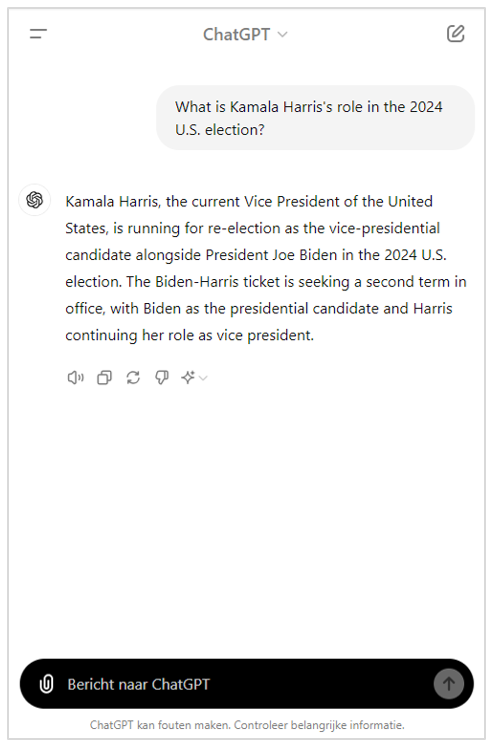

While this answer is coherent and grammatically correct, it might not reflect the most current information, such as the fact that Kamala Harris is now officially a U.S. presidential candidate.

#### Asking ChatGPT With Context

Now, let's provide ChatGPT with some relevant information or context before asking the same question. Imagine that before asking the question, we "feed" ChatGPT a short summary or document that contains details relevant to our question. Here’s how ChatGPT might respond with that extra information:

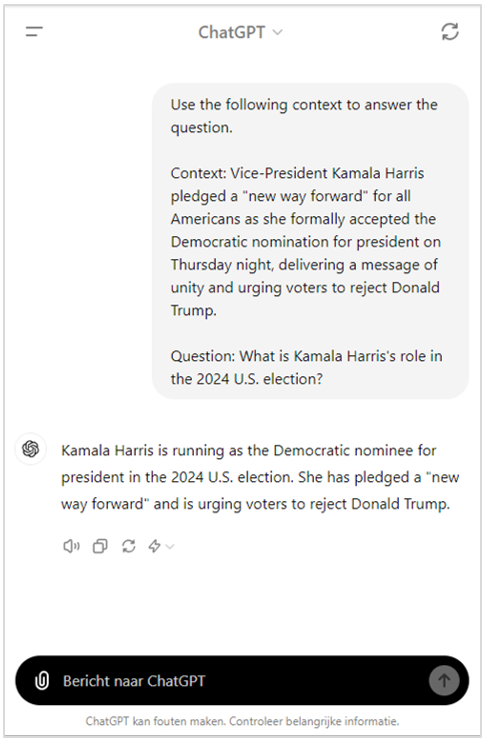

Notice how the answer is now accurate and informative. This is because ChatGPT was given specific information to help it generate a better response.

#### Put it simple

The procedure of providing ChatGPT with the right information to generate accurate and useful answers is what Retrieval Augmented Generation (RAG) is all about, and it's what we will implement in this workshop.

# What are we going to do?
In this hands-on workshop, we will develop a retrieval-augmented generation (RAG) solution to enhance a Large Language Model (LLM) in addressing questions about the book ["Alice's Adventures in Wonderland"](https://www.gutenberg.org/cache/epub/11/pg11-images.html), a children's story written by Lewis Carroll in 1865, follows a young girl who falls down a rabbit hole and enters a strange and magical world. The text is accessible at the [Gutenberg Project](https://www.gutenberg.org/) and can be used without restrictions. Although ChatGPT is an example of an LLM, we will be working with a different LLM in this workshop.

Most of the LLMs are likely to generate high quality response when asked about this book. The widespread availability of the text on the Gutenberg Project and its popularity on the internet have likely contributed to the model's proficiency in this area. However, we will try to prevent the LLM from relying on any embedded knowledge about the book by explicitly mentionning this to the LLM (we will see this later on). While this may not entirely eliminate the risk of prior knowledge influencing the model's output, it should be sufficient for this workshop purposes. For each question we want to ask, we will search and retreive relevant pieces of text from the book, and feed them as a context to the LLM to answer a specific question.

**Expected learning points:**
-	Explain the concepts of Retrieval-Augmented Generation (RAG) and generative Large Language Models (LLMs).
-	Understand how RAG and LLMs can be used to answer questions while specifically considering a context.
-	Identify the strengths and limitations of using RAG.
-	Gain practical experience using RAG and LLM tools to answer questions pertaining to a specific domain.


# 1. Large Language Models (LLMs)

LLMs are a type of artificial intelligence (AI) that can understand and generate human-like text. They are called "large" because they have been trained on vast amounts of text data and contain billions of parameters (numbers), which are the internal settings that the model adjusts during training to learn patterns in the data.


## 1.1 How does an LLM work?
At its fundamental level, an LLM is a complex statistical model that learns to predict the next word in a sequence based on the words that came before it. For example, if you start a sentence with "The sky is," the model might predict the next word could be "blue" or "clear." By stringing together predictions, these models can generate coherent paragraphs, write code, translate text, and much more. The power of LLMs comes from their ability to learn from vast amounts of text and generalize to a wide variety of language tasks.

⚙️ **Technical details:** LLMs are built using neural networks, specifically a type of architecture known as a [Transformer](https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture), which is highly effective for processing sequences of data, like text. The youtube channel 3Blue1Brown has a series of videos to visually explain [neural networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) and [transformers](https://www.youtube.com/watch?v=wjZofJX0v4M), if you are interested to learn more.

## 1.2 How are LLMs Trained?
Training an LLM involves two main steps:

**Pre-training:** The model is first trained on a massive dataset (like books, websites, and articles) to predict the next word in a sentence. During this process, the model learns grammar, the structure of sentences, facts about the world, and gains some (simple) reasoning abilities. For example, the model might learn that "Amsterdam" is a city and that "Einstein" was a scientist.

**Fine-tuning:** After pre-training, the model may undergo fine-tuning, where it is further trained on a smaller dataset with more specific information, often with human feedback. This helps the model become more accurate and aligned with specific tasks, like answering questions or writing summaries.


## 1.3 What are parameters?

The number of parameters in an LLM is crucial. Parameters are like the "knobs" the model adjusts during training to get better at predicting words. More parameters generally mean the model can capture and recognize more complex patterns, but it also requires more computational resources to train and run. Small LLMs might have millions of parameters. Large LLMs like GPT-4 have hundreds of billions of parameters.

## 1.4 Examples of LLMs

**Open-Source**
- Llama (developed by Meta): The latest version is 3.1, [Llama 3.1](https://ai.meta.com/blog/meta-llama-3-1/) and comes in 8B, 70B and—for the first time—405B parameters
- Mistral (developed by Mistral AI): [Mistral Nemo 12B parameters, Mistral 7B and Mixtral 8x22B](https://huggingface.co/mistralai)
- Gemma (Google): The latest version is 2. [Gemma 2](https://blog.google/technology/developers/google-gemma-2/) comes in 9B and 27B parameters

**Proprietary LLMs:**
- [GPT-4](https://openai.com/chatgpt/)(OpenAI): one of the most well-known LLMs, with an estimated 1 trillion paramters
- [Gemini](https://gemini.google.com/) (developed by Google)
- [Mistral Large](https://mistral.ai/news/mistral-large/) (developed by Mistral AI): Known for being efficient and powerful, Mistral has been making waves in the LLM landscape

## 1.5 Practical Applications
LLMs have a wide range of applications, including:

- Chatbots: Creating virtual assistants that can handle customer inquiries.
- Content Creation: Generating articles, blogs, and social media posts.
- Code Writing: Assisting developers in writing and debugging code.
- Translation: Automatically translating text between languages.
- Sentiment Analysis: Understanding opinions and sentiments from text data.

# 2. What is Retrieval Augmented Generation, or RAG ?

Think of LLMs as really smart students who learned from a lot of available text material online. They can discuss many things, but the knowledge is limited to the content of what was included in the training of the LLM, including also the point in time to which information was included. This is called the '**knowledge cutoff**' of an LLM.  If you want the LLMs to also take into account information not in the included texts, like **private data** or **recent events**,  you need to provide the LLM with these extra materials. **RAG (Retrieval Augmented Generation)** is like feeding LLMs relevant articles or notes to help them answer your questions better.

Consider for example ChatGPT 3.5, with its knowledge cutoff of January 2022, wouldn't be aware of the recent FDA approval for the new drug for hypertension, Tryvio. See below the response of ChatGPT when the question "What is Tryvio?" is used as a **prompt** (what you feed as text to ChatGPT). Although ChatGPT has been **fine-tuned** to respond with "I don't know" in such cases, it may **hallucinate** as well. In case of hallucinations, the LLM provides an output which is coherent and grammatically correct but contains information which is incorrect or does not make sense. LLM hallucination poses a significant threat in healthcare. Thus, both through hallucinations and the inclusion of limited training material, LLMs can generate unreliable information or treatment recommendations based on flawed assumptions, potentially leading to misdiagnosis, delayed treatment, and compromised patient safety.

RAG incorporates external (here in the image from wikipedia), reliable information to ground the LLM's outputs. This approach significantly reduces hallucinations and improves the overall quality and accuracy of the generated text.


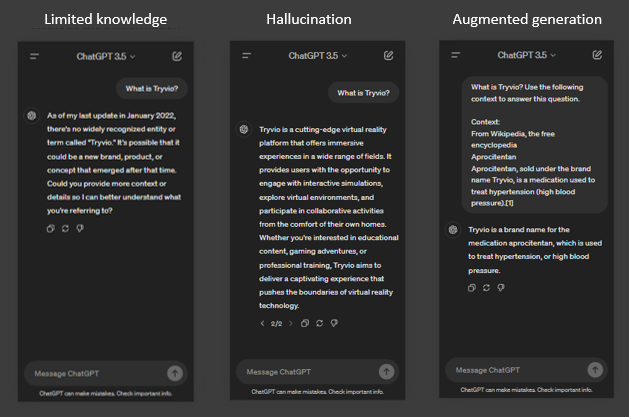

# 3. RAG architecture


A typical RAG architecture consists of two key components: **indexing** & **retrieval and generation**, indicated in the figure below.

<font color='deeppink'>1- Indexing (pink box in the figure): </font> Imagine you're organizing a library. You take all the books and divide them into different sections: fiction, non-fiction, science, etc. Then you create a detailed catalog listing each book's title, author, and section. You can also use numbers to further organize them, like having a section for "Science Fiction" and within that section, you could have books numbered 1-10 based on their publication year. This catalog is the index. It helps you find a specific book quickly.

<font color='green'>2- Retrieval (green box in the figure):</font> Now, imagine someone asks you for a book about cats. You go to your catalog, search for "cats," and find a few books that match. This is retrieval. You've used the index to find the information you needed. <font color='green'>Generation:</font> is like a writer using the books found by the librarian in the library to create a new story. In the context of the cat example, this could be an auther writing a short story about a detective cat solving a mystery in the library, using the information from the found books. The auther is essentially creating new content based on the existing information in the library.

In the context of a RAG, the LLM plays the role of the auther, "grounded" by the information retreived from the books (or, in technical terms, the indexed data).

In the next section, the two components are explained with python code implementations using [LangChain](https://www.langchain.com/).

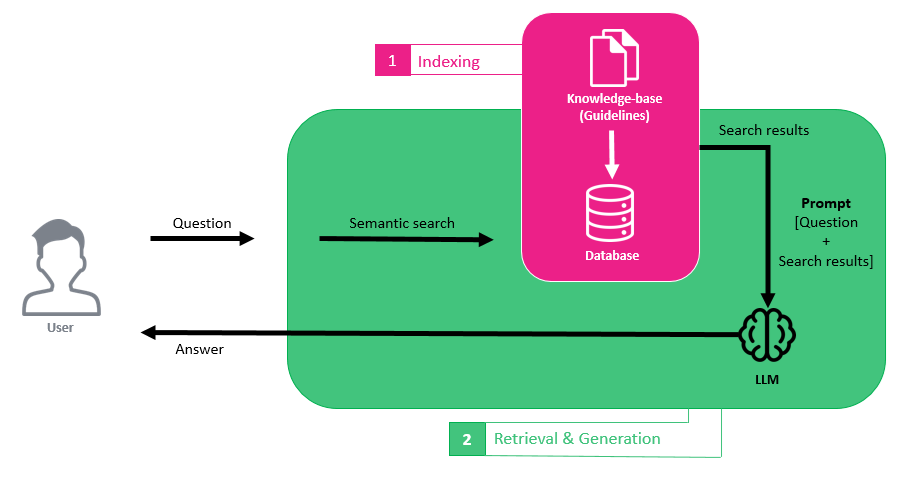

## 3.1 Indexing

In RAG, indexing means the process of organizing the required text data in a way that allows the RAG system to quickly find the most relevant pieces of information for a given question. In this way, a local library is created where RAG can identify the sections which contain the information addressed in the question, instead of having the complete text.

Indexing involves 3 steps:
- Load the data (here the book), hereafter called a **document**.
- Split the document into pieces of text called **chunks**.
- Convert the chunks into so-called **vectors** (the labels the library has given to a specific book), and store those in a database.

### 3.1.1 Load the data
The piece of code below will load the book. As we stated before, this is just one document. Additional documents can be loaded, for example more books or your private documents, but for this workshop, we will just work with one.

In [2]:
from langchain_community.document_loaders import TextLoader
from langchain_community.document_loaders import UnstructuredURLLoader

loader = UnstructuredURLLoader(["https://raw.githubusercontent.com/nomandormosh/u21-workshop-2024/main/alice.txt"])
docs = loader.load()

print("Number of documents: ", len(docs)) # Get the total number of documents
print(docs[0].page_content[:200]) # Prints the first 200 characters of the document

Number of documents:  1
Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

CHAPTER I. Down the Rabbit-Hole CHAPTER II. The Pool of Tears CHAPTER III. A Caucus-Race and a Long Ta


### 3.1.2 Splitting the document into chunks of text
The purpose of this step is to to break down a large document into smaller, more manageable pieces. This makes it easier to search and process the information, especially when working with LLMs which can only handle limited amounts of text at once.

Imagine you have a really long story. It's so long that it's hard to find specific information quickly. In this case, you might break it up into smaller chapters or sections. That's basically what happens when splitting the document.

There are many ways to acheive this. The following code will split the document into 512 character long pieces, with a 128-character overlap between consecutive chunks. This setup ensures that the text is split in chunks of 512 characters, but also has overlapping pieces of 128 characters each, which can help preserve context between chunks (see the overlap between chunk #99 and #100 below).

In [6]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
doc_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=128)
chunked_documents = doc_splitter.split_documents(docs)

print("Total number of chunks: ", len(chunked_documents))   # Total chunks
print("Chunk #99:\n", chunked_documents[10].page_content)   # Prints the content of the chunk at index 10
print("Chunk #100:\n", chunked_documents[11].page_content)   # Prints the content of the chunk at index 11

Total number of chunks:  410
Chunk #99:
 Down, down, down. Would the fall _never_ come to an end? “I wonder how many miles I’ve fallen by this time?” she said aloud. “I must be getting somewhere near the centre of the earth. Let me see: that would be four thousand miles down, I think—” (for, you see, Alice had learnt several things of this sort in her lessons in the schoolroom, and though this was not a _very_ good opportunity for showing off her knowledge, as there was no one to listen to her, still it was good practice to say it over) “—yes,
Chunk #100:
 for showing off her knowledge, as there was no one to listen to her, still it was good practice to say it over) “—yes, that’s about the right distance—but then I wonder what Latitude or Longitude I’ve got to?” (Alice had no idea what Latitude was, or Longitude either, but thought they were nice grand words to say.)


### 3.1.3 Turning Words into Numbers and Storing Them
Once the text chunks are created, these chunks are converted into numbers to allow the computer to understand the text. This is called text-to-vector conversion, thereby translating from human language to computer language. Each text chunk gets a special code, or vector (sequence of numbers). This vector represents the meaning of the chunk of text. Imagine each chunk is a fruit, and the vector is a number that describes its taste, color, and size. **Embeddings** are those numbers. They are mathematical representations of words or sentences in a numerical space. Each number corresponds to a different aspect of the word or sentence.

Let's illustrate this with an example. Imagine that we have 4 sentences:
- *Amsterdam's population is over 800,000 people.*
- *Amsterdam has many canals and bike paths.*
- *Tulips are a famous symbol of Amsterdam.*
- *Amsterdam is the capital of the Netherlands.*

And we have one question: *How many people live in Amsterdam?*

After mapping these sentences into vectors, we can plot a 2d graph to represent them and show the relation between the texts, as shown in the figure below. We would expect these sentences to co-exist near each other becuase they are semantically similar, as they are all talking about Amsterdam. However, we can see that Chunk 1 is closest related to the question, as it also indicates the number of people.

In reality, embeddings have many more dimensions (often hundreds or thousands) to capture the nuances of language. Sentences with similar meanings will be closer together in this high-dimensional space.

Why do this? When we want the computer to find information, the computer can quickly look at the vectors instead of reading the whole text. For example, if we want to find the most similar sentence or chunk to the question "How many people live in Amsterdam?", then we just find the one with the shortest distance to the question as indicated with the green arrow.

Finally, the created vectors are stored in a vector database that can be used for search and retreival later on. To create the vectors for our selected document and store them in the vector database, run the code below.

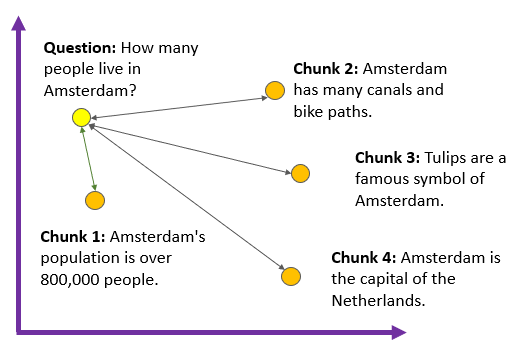



In [7]:
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings

embedding_model_name = "mixedbread-ai/mxbai-embed-large-v1" # Model ID for the embedder. You may choose any model you prefer.
embeddings = None
embeddings = HuggingFaceEmbeddings(
    model_name=embedding_model_name,
    model_kwargs={'device': 'cpu'},
    encode_kwargs={'normalize_embeddings': False}
)

# Embed our chunks and store in the vector database
vectorstore = Chroma.from_documents(documents=chunked_documents, embedding=embeddings)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/114k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

The database has been created. Let's inspect how our chunks are stored and mapped to numbers. Run the code below!

In [9]:
print("Total emmbedded chunks: ", len(vectorstore.get()["documents"])) # Does the number match our total chunks?

print("Chunk #1: ", vectorstore.get()["documents"][0]) # Prints chunk #1

# Get embedding vector for chunk #1
chunk_id = vectorstore.get()["ids"][0]
chunk_vector = vectorstore._collection.get(ids=[chunk_id], include=['embeddings'])["embeddings"]
print("Vector's dimensions: ", len(chunk_vector[0]))
print("The first 10 dimensions: ", chunk_vector[0][:10])

Total emmbedded chunks:  410
Chunk #1:  The next thing was to eat the comfits: this caused some noise and confusion, as the large birds complained that they could not taste theirs, and the small ones choked and had to be patted on the back. However, it was over at last, and they sat down again in a ring, and begged the Mouse to tell them something more.

“You promised to tell me your history, you know,” said Alice, “and why it is you hate—C and D,” she added in a whisper, half afraid that it would be offended again.
Vector's dimensions:  1024
The first 10 dimensions:  [0.8802280426025391, -0.2799432575702667, 0.04721113666892052, 0.4570988714694977, -0.38447830080986023, -0.9568196535110474, -0.7520017027854919, 0.3849845826625824, 0.2480095773935318, -0.3640705943107605]


We now have our vector database ready for search. Let's try to search for top 3 chunks that are semantically similar to the sentence "Dinah was the cat" by calculating the distance of the different chunks to the sentence.

*Note: this search requires the input sentence to be mapped into a vector. We don't have to do this by our self as the vector database will do this under the hood.*

In [13]:
sentence = "the cat is Dinah"
results = vectorstore.similarity_search_with_score(sentence, k=3)

for i, item in enumerate(results):
    print(f"{i+1}- Distance {item[1]} - {item[0].page_content}\n")

1- Distance 187.7977294921875 - “I wish I had our Dinah here, I know I do!” said Alice aloud, addressing nobody in particular. “She’d soon fetch it back!”

“And who is Dinah, if I might venture to ask the question?” said the Lory.

Alice replied eagerly, for she was always ready to talk about her pet: “Dinah’s our cat. And she’s such a capital one for catching mice you can’t think! And oh, I wish you could see her after the birds! Why, she’ll eat a little bird as soon as look at it!”

2- Distance 191.81517028808594 - “Well, perhaps not,” said Alice in a soothing tone: “don’t be angry about it. And yet I wish I could show you our cat Dinah: I think you’d take a fancy to cats if you could only see her. She is such a dear quiet thing,” Alice went on, half to herself, as she swam lazily about in the pool, “and she sits purring so nicely by the fire, licking her paws and washing her face—and she is such a nice soft thing to nurse—and she’s such a capital one for catching mice—oh, I beg your

Cool! Based on this search and by identifying the vector(s) with the least distance, the identified text will serve as our retreival. To summarize, in this search, the answer to a particular question or sentence is found by comparing the vectors and the most relevant results based on the semantic search is returned as output.

## 3.2 Retrieval and generation

After setting up the vector database (section 3.1), the next step is to:  
*   load the desired LLM to process the question and generate the answer
*   define the prompt template which will be provided to the LLM

#### 3.2.1 Load the LLM
We will use the [instructed version of Llama 3.1 8B](https://huggingface.co/meta-llama/Meta-Llama-3.1-8B-Instruct), released by Meta last month!

⚙️ **Technical details:** As indicated in the name, it consists of 8B parameters. This would make it impossible to get loaded in this Colab environment as it requires 8B * 4 bytes = 32 GB to be loaded in full precision, instead of the 15 GB available here. To solve this, we will use a quantized version of the model. **Quantization** is a technique in which each parameter is mapped to a smaller set of discrete finite values and requires less RAM at the expense of losing some quality of the LLM, but allowing us to use it in the current environment.

In [14]:
import torch
from langchain_huggingface import HuggingFacePipeline

# Load 4bit quant of the LLM
model_id = "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit"
hf = None
hf = HuggingFacePipeline.from_model_id(
    model_id=model_id,
    device=None,
    task="text-generation",
    pipeline_kwargs={"max_new_tokens": 256,
                     "temperature": 0.00001,
                     "repetition_penalty": 1.1,
                     "return_full_text": False},
)

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


RuntimeError: No GPU found. A GPU is needed for quantization.

Let's try to ask this LLM a question without grounding it with context from the book.

*Note: We will ask the same question later on using our RAG solution to compare the results.*

In [ ]:
print(hf.invoke("What is the incidence of HF in Europe?"))

#### 3.2.2 Prompt template
It is more convenient to have a template that we can re-use each time we want to chat with the LLM. It will be the text prompt that we will feed to the LLM. Our template consists of:
* **instruction:** it will be the same always. "You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know."
* **question placeholder:** the specific question that needs to be answered.
* **context placeholder:** the place to put the retreived chunks or text that will be used to answer the question.

As such, we can use this template always to ask our desired questions (section 4). With the code below, the template of the prompt is created.

In [15]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough

def format_docs(docs):
    return "\n\n".join("- " + doc.page_content for doc in docs)

retriever = vectorstore.as_retriever(search_kargs={"k": 5}) # k is the number of retreived relevant chunks of documents that we want to have

template = """You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know.

Question: {question}

Context: {context}

Answer:"""

prompt = PromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | hf
    | StrOutputParser()
)

TypeError: Expected a Runnable, callable or dict.Instead got an unsupported type: <class 'NoneType'>

# 4. RAG in action

#### 4.1 Simple question

Let's ask first a simple factual question about the prevelance of heart failure in Europe.

Please copy the following question:
> **What is the incidence of HF in Europe?**

and paste it between the quotation  marks as shown below
> **question_1 = <font color='red'>"</font>What is the incidence of HF in Europe?<font color='red'>"</font>**

In [ ]:
question_1 = ""
print(rag_chain.invoke(question_1))

The answer is fine but not complete. The guidelines say "Currently, the incidence of HF in Europe is about 3/1000 person-years (all age-groups) or about 5/1000 person-years in adults.". So, 5/1000 specificly refers to the incidence in adults.

Let's inspect the prompt generated by our RAG solution for this particular question to see if we can explain this issue.

In [ ]:
from langchain_core.callbacks import BaseCallbackHandler
from typing import Any, Dict, List


class CustomHandler(BaseCallbackHandler):
    def on_llm_start(
        self, serialized: Dict[str, Any], prompts: List[str], **kwargs: Any
    ) -> Any:
        formatted_prompts = "\n".join(prompts)
        print(f"Prompt:\n{formatted_prompts}")

# You can call this line of code to inspect the prompt
print(rag_chain.invoke("What is the incidence of HF in Europe?", config={"callbacks": [CustomHandler()]}))

In the prompt, the chunk provided in the context is turnicated "Currently, the incidence of HF in Europe is about 3/1000 person-years (all age-groups) or about 5/1000". This is why the LLM couldn't give a perfect answer.

Recall that we splitted the document into chunks using specific parameters (chunk_size and chunk_overlap). We need to increase the chunk_size to allow longer chunked text in the context. This is one of the tuning parameters if we want to tweak our RAG.

#### 4.2 Out-of-scope question
What if we ask a question completely unrelated to the guidelines of heart failure?

In [ ]:
question_2 = "What is the GDP of the Netherlands?"
print(rag_chain.invoke(question_2))

NameError: name 'rag_chain' is not defined

Good, the LLM recognized that this question is completely unrelated to the provided context.

#### 4.3 Complex questions
Most likely, users of the LLM will want to also retrieve more complex information from the LLM and thus pose questions containing information which should be considered when providing the answer. For example, the treatment of patients with heart failure and other co-morbidities can differ from general heart failure treatment.

In [ ]:
question_4 = "How to treat heart failure with diabetes?"
print(rag_chain.invoke(question_4))

In the same context, also different types of heart failure may require different medical treatment.

In [ ]:
question_5 = "What medications recommended for patients with HFrEF?"
print(rag_chain.invoke(question_5))

Both question 4 and 5 provide important information in the question which should be addressed in the answer to the question. However, another aspect in LLMs is the formulation of the question, as these can be posed using different wording. Given that our search is semantically based, we should anticipate similar results.

In [ ]:
question_6 = "What is the standard pharmacological treatment for patients with HFrEF?"
print(rag_chain.invoke(question_6))

Our semantic search is performing as expected. However, it's important to remember that the effectiveness of semantic search heavily relies on the chosen (embedding) model. Different wordings of the same query might yield varying results due to the model's limitations in capturing semantic nuances. To illustrate this, try rephrasing the question in the box above (question_6) and observe the outcomes.

#### 4.4 Additional complex questions

In [ ]:
question_7 = "How to diagnose HFrEF?"
print(rag_chain.invoke(question_7))

In [ ]:
question_8 = """A 65-year-old male with a history of hypertension, diabetes, and prior myocardial infarction
presents with worsening dyspnea, fatigue, and ankle swelling. Exam shows JVD, an S3 heart sound, and pitting edema.
Investigations reveal an ejection fraction of 35%, cardiomegaly, and elevated BNP.
What is his heart failure type according to the ESC guidelines?"""
print(rag_chain.invoke(question_8))

As demonstrated by the outputs, the current RAG setup is insufficient for answering these queries. This limitation can be attributed to several factors:

* Long question: Long questions pose a significant challenge due to the difficulty of accurately capturing their semantic meaning within a fixed-size vector. This ambiguity hinders effective information retrieval.
* Information Dispersion: Relevant information might be scattered across the document, resulting in retrieved text fragments that may not fully address the query's essence or might be irrelevant altogether.
* Complex Reasoning: The answers to some questions require advanced reasoning capabilities that exceed the current limitations of LLMs.

# 5. Now it's your turn! Let's put the RAG solution to your test.

Here is the text of the book [Alice's Adventures in Wonderland](https://www.gutenberg.org/cache/epub/11/pg11-images.html): feel free to browse and craft your questions to see how well the RAG system performs in handling them.

In [1]:
user_question = ""
print(rag_chain.invoke(user_question))

NameError: name 'rag_chain' is not defined

In [ ]:
user_question = ""
print(rag_chain.invoke(user_question))

In [ ]:
user_question = ""
print(rag_chain.invoke(user_question))

# 6. [Optional] Tweaking your RAG pipeline

While RAG offers a promising approach to mitigating hallucinations, it introduces its own set of challenges that can significantly impact its performance. Here are some key factors to consider:

1. Chunking and Text Splitting: The length and overlap of text chunks directly influence the quality of information retrieved. Finding the optimal balance is crucial.
2. Embedding Model Selection: Choosing the right embedding model is essential. While the chosen model might excel with medical text, exploring [alternatives](https://huggingface.co/sentence-transformers) could potentially lead to further improvements. (models)
3. LLM Choice: The underlying LLM can also play a role. Experimenting with different models such as [Mistral 0.3](unsloth/mistral-7b-instruct-v0.3-bnb-4bit) or [gemma 2](https://huggingface.co/unsloth/gemma-2-9b-bnb-4bit) might yield better results.

It's important to note that there are many advanced RAG techniques beyond the scope of this workshop that can further enhance performance.

### Balancing precision and context in document chunking/splitting
When splitting the documents into chunks, there is a tradeoff between accuracy and comprehensiveness. Smaller chunks can yield more precise representations of their content, but at the risk of losing contextual information. Conversely, larger chunks preserve context but may sacrifice the detailed understanding achievable through smaller divisions.

We will experiment with a hybrid text splitting strategy that incorporates both smaller and larger text units. The heart failure guidelines is structured with HTML tags. Similar to our initial experiment, we will divide the text into smaller chunks (chunk_size=512, chunk_overlap=128) and convert them into vector embeddings for efficient searching. However, to enrich the search results before LLM processing, we will retrieve the entire HTML section encompassing the relevant chunk.

#### 6.1 Let's first load the book in HTML format and split it into sections

In [52]:
from langchain_text_splitters import HTMLHeaderTextSplitter
from langchain_community.document_loaders import TextLoader
from langchain_community.document_loaders import UnstructuredURLLoader

# Load the book in HTML format in order to make use of the <h> tags to divide it into sections
loader = UnstructuredURLLoader(["https://raw.githubusercontent.com/nomandormosh/u21-workshop-2024/main/alice_html.txt"])
docs = loader.load()

headers_to_split_on = [
        ("h2", "Header 2")
    ]

html_splitter = HTMLHeaderTextSplitter(headers_to_split_on)
new_docs = html_splitter.split_text(docs[0].page_content)

# Print one of the sections
temp_section = new_docs[11].dict()
temp_section["page_content"] = temp_section["page_content"][:100] # Take the first 100 letters of the text
temp_section

{'id': None,
 'metadata': {'Header 2': 'CHAPTER VI. Pig and Pepper'},
 'page_content': 'For a minute or two she stood looking at the house, and wondering what to do next, when suddenly a f',
 'type': 'Document'}

As you can see from the output above, this is the 6th chapter of the book. We printed only the first 100 characters of the contents.

We now have the contents of the sections including their headings.

#### 6.2 Split into chunks, link to parent section, map to vector, and store in vector database

In [ ]:
from langchain.retrievers import ParentDocumentRetriever
from langchain.storage import InMemoryStore

child_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=128) # Similar to our initial experiment
store = InMemoryStore() # a dictionary to store the id of the chunk and the corresponding document id
new_vectorstore = Chroma(embedding_function=embeddings)
new_vectorstore.reset_collection()

new_retriever = ParentDocumentRetriever(
        vectorstore=new_vectorstore,
        docstore=store,
        child_splitter=child_splitter,
        childK=20,
        parentK=5,
        search_kwargs={"k": 2} # Retreive 2 full sections
    )

# Perform chunking, linking each chunk to it's parent section, and finally map to vector and store in a vector database
new_retriever.add_documents(new_docs, ids=None)

Let's see how the chunks look like when we search for our question

In [ ]:
new_vectorstore.similarity_search("How to diagnose HFrEF?")

And, what would be the corresponding retreived sections to be given to the LLM for this question?

In [ ]:
retrieved_docs = new_retriever.invoke("How to diagnose HFrEF?")
retrieved_docs


#### 6.3 Test it out

In [ ]:
parent_rag_chain = (
    {"context": new_retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | hf
    | StrOutputParser()
)

In [ ]:
print(parent_rag_chain.invoke("How to diagnose HFrEF?"))

The response seems to be improved compared to the answer of the question previously given before in section 5.

# 7. Summary

In this workshop, we introduced the concepts of RAG and LLMs and their potential application to provide an answer for a question grounding that with a context from a book.


- **LLMs:** These are powerful AI models trained on vast amounts of text data. They can generate human-like text, translate languages, write different kinds of creative content, and answer your questions in an informative way. However, they can also suffer from hallucinations, where they provide incorrect or misleading information, especially when dealing with limited or outdated knowledge.
- **Knowledge Cutoff:** LLMs have a limited timeframe of knowledge based on the data they are trained on. Information not included in the training data, like recent medical advancements, might not be reflected in the LLM's responses.
- **RAG:** RAG addresses the limitations of LLMs by incorporating relevant external information sources into the question-answering process. This helps to ground the LLM's outputs and reduce hallucinations, leading to more accurate and reliable answers.
- **Building a RAG System:** We explored constructing a RAG system using LangChain, a Python library. The system involves two main components:
  - *Indexing and Retrieval:* This involves creating a searchable database of relevant text chunks extracted from the guidelines. When a question is asked, the system retrieves the most relevant chunks based on their semantic similarity.
  - *Generation:* The retrieved information is then provided to an LLM along with the question. The LLM uses this context to generate a comprehensive answer.
- **RAG optimization:** Although RAG has the potential of improving LLMs outputs, it brings it's own challanges. Many factors can impact the performance, such as chunking size, embedding model selection, and embedding model choice.

To sum up, RAG provides an opportunity to enhance the accuracy and reliability of LLMs, especially in fields like healthcare where precision is important. By grounding LLMs with external, up-to-date sources, RAG helps mitigate issues like hallucinations and outdated information. The retrieval model is crucial in RAG systems, with success depending on its optimization and data quality. The LLM's role is simply to summarize, making its choice less important than the quality of retrieval.